In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
# Assuming the index aligns correctly
X['target'] = y['y']

print(X)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [5]:
X.shape

(45211, 17)

In [6]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
col_names = ['month', 'loan', 'housing', 'education', 'marital', 'job', 'target']


for col in col_names:
    
    print(X[col].value_counts()) 

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
target
no     39922
yes     5289
Name: count, dtype: int64


In [8]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
target             0
dtype: int64

In [9]:
threshold = 0.5
X = X.loc[:, X.isnull().mean() < threshold]

In [10]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
target             0
dtype: int64

In [11]:
X = X.dropna(subset=['education'])

In [12]:
X = X.drop(columns=['contact'])

In [13]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
education_order = [['primary', 'secondary', 'tertiary']]  
ordinal_encoder = OrdinalEncoder(categories=education_order)
X['education'] = ordinal_encoder.fit_transform(X[['education']])

In [14]:
other_categoricals = ['month', 'loan', 'housing', 'marital', 'job', 'default', 'target']
x = pd.get_dummies(X, columns=other_categoricals)

print(x)

       age  education  balance  day_of_week  duration  campaign  pdays  \
0       58        2.0     2143            5       261         1     -1   
1       44        1.0       29            5       151         1     -1   
2       33        1.0        2            5        76         1     -1   
5       35        2.0      231            5       139         1     -1   
6       28        2.0      447            5       217         1     -1   
...    ...        ...      ...          ...       ...       ...    ...   
45206   51        2.0      825           17       977         3     -1   
45207   71        0.0     1729           17       456         2     -1   
45208   72        1.0     5715           17      1127         5    184   
45209   57        1.0      668           17       508         4     -1   
45210   37        1.0     2971           17       361         2    188   

       previous  month_apr  month_aug  ...  job_retired  job_self-employed  \
0             0      False      F

In [15]:
df = x

In [16]:
df.head()

,age,education,balance,day_of_week,duration,campaign,pdays,previous,month_apr,month_aug,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,default_no,default_yes,target_no,target_yes
0,58,2.0,2143,5,261,1,-1,0,False,False,...,False,False,False,False,False,False,True,False,True,False
1,44,1.0,29,5,151,1,-1,0,False,False,...,False,False,False,False,True,False,True,False,True,False
2,33,1.0,2,5,76,1,-1,0,False,False,...,False,False,False,False,False,False,True,False,True,False
5,35,2.0,231,5,139,1,-1,0,False,False,...,False,False,False,False,False,False,True,False,True,False
6,28,2.0,447,5,217,1,-1,0,False,False,...,False,False,False,False,False,False,True,False,True,False


In [17]:
import pandas as pd


y = df['target_yes']  

x = df.drop(columns=['target_yes', 'target_no'])

print(x.head())  
print(y.head())

   age  education  balance  day_of_week  duration  campaign  pdays  previous  \
0   58        2.0     2143            5       261         1     -1         0   
1   44        1.0       29            5       151         1     -1         0   
2   33        1.0        2            5        76         1     -1         0   
5   35        2.0      231            5       139         1     -1         0   
6   28        2.0      447            5       217         1     -1         0   

   month_apr  month_aug  ...  job_housemaid  job_management  job_retired  \
0      False      False  ...          False            True        False   
1      False      False  ...          False           False        False   
2      False      False  ...          False           False        False   
5      False      False  ...          False            True        False   
6      False      False  ...          False            True        False   

   job_self-employed  job_services  job_student  job_technicia

In [89]:
f = df.iloc[:, :-1].values
d = df.iloc[:, -1].values.reshape(-1,1)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=41)

In [ ]:
### Decsion tree

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': [None, 10, 20, 30],   
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4],     
    'max_features': [None, 'sqrt', 'log2']  
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.8946


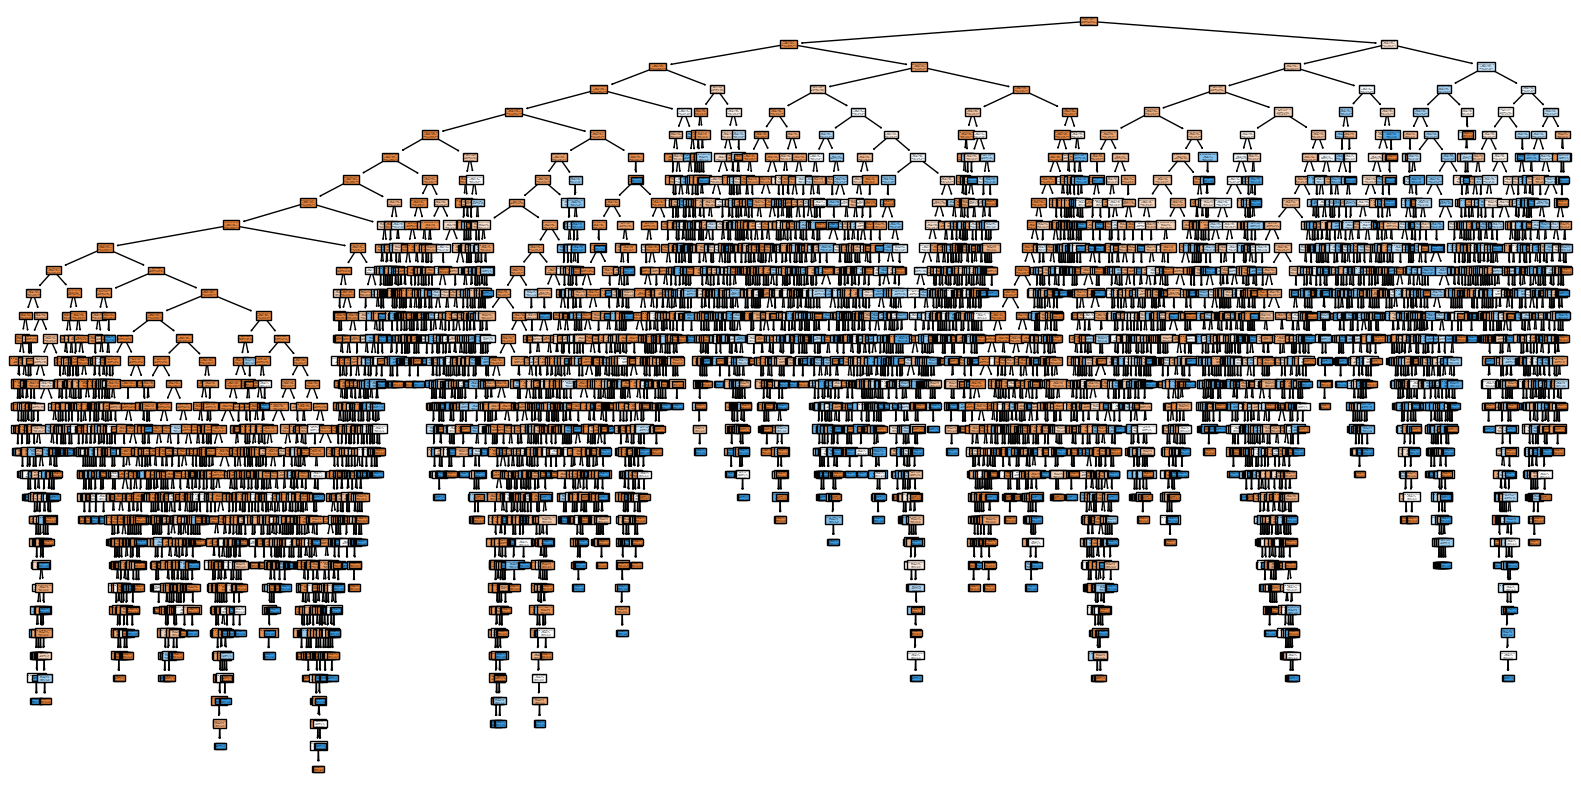

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = x.columns  
class_names = np.unique(y).astype(str)  
model = tree.DecisionTreeClassifier()
model.fit(x, y)

plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()


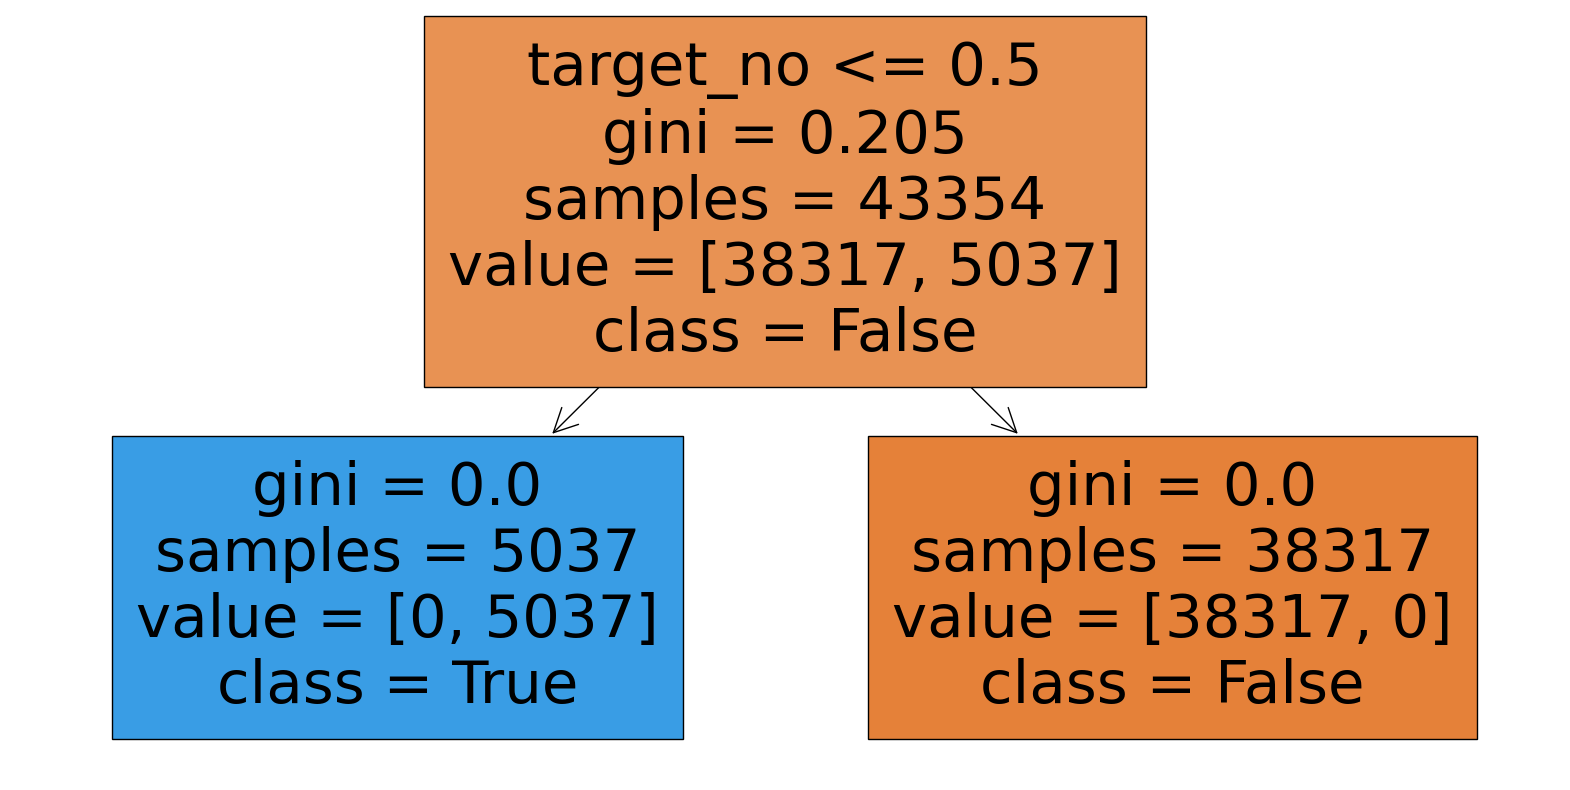

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

feature_names = x.columns  
class_names = np.unique(Y).astype(str) 
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2)   
model.fit(x, Y)

plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()


In [22]:
feature_importances = best_model.feature_importances_
for feature, importance in zip(feature_names, feature_importances):
    print(f'{feature}: {importance:.2f}')


age: 0.06
education: 0.01
balance: 0.04
day_of_week: 0.05
duration: 0.46
campaign: 0.01
pdays: 0.13
previous: 0.01
month_apr: 0.01
month_aug: 0.01
month_dec: 0.01
month_feb: 0.01
month_jan: 0.00
month_jul: 0.00
month_jun: 0.01
month_mar: 0.04
month_may: 0.00
month_nov: 0.01
month_oct: 0.02
month_sep: 0.01
loan_no: 0.00
loan_yes: 0.00
housing_no: 0.01
housing_yes: 0.08
marital_divorced: 0.00
marital_married: 0.01
marital_single: 0.00
job_admin.: 0.00
job_blue-collar: 0.00
job_entrepreneur: 0.00
job_housemaid: 0.00
job_management: 0.00
job_retired: 0.00
job_self-employed: 0.00
job_services: 0.00
job_student: 0.00
job_technician: 0.00
job_unemployed: 0.00
default_no: 0.00
default_yes: 0.00


In [23]:
from sklearn.tree import export_text

feature_names = list(x.columns)

rules = export_text(best_model, feature_names=feature_names)
print(rules)


|--- duration <= 472.50
|   |--- pdays <= 30.50
|   |   |--- month_mar <= 0.50
|   |   |   |--- age <= 60.50
|   |   |   |   |--- month_oct <= 0.50
|   |   |   |   |   |--- month_apr <= 0.50
|   |   |   |   |   |   |--- duration <= 330.50
|   |   |   |   |   |   |   |--- month_sep <= 0.50
|   |   |   |   |   |   |   |   |--- month_feb <= 0.50
|   |   |   |   |   |   |   |   |   |--- month_dec <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- month_dec >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- month_feb >  0.50
|   |   |   |   |   |   |   |   |   |--- day_of_week <= 9.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- day_of_week >  9.50
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- month_sep >  0.50
|   |   |   |   |   |   |   |   |--- duration <= 183.00
|   |   |   |   |   |

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(best_model, x, features=range(x.shape[1]), feature_names=feature_names)


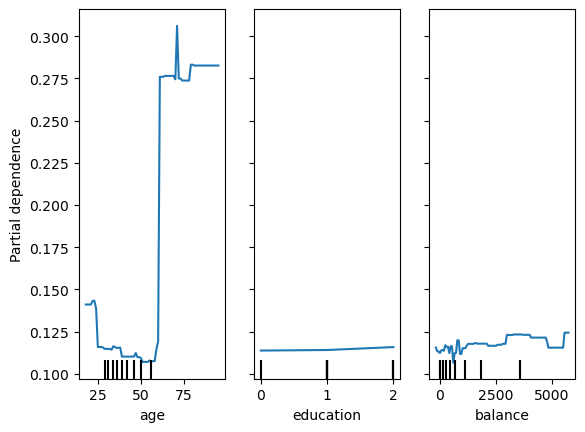

In [24]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(best_model, x, features=[0, 1, 2])  
plt.show()


In [27]:
print(len(feature_names))  
print(x.shape[1])  


40
40


In [28]:
feature_names = np.array(feature_names)


In [30]:
print("feature_names:", feature_names)



feature_names: ['age' 'education' 'balance' 'day_of_week' 'duration' 'campaign' 'pdays'
 'previous' 'month_apr' 'month_aug' 'month_dec' 'month_feb' 'month_jan'
 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct'
 'month_sep' 'loan_no' 'loan_yes' 'housing_no' 'housing_yes'
 'marital_divorced' 'marital_married' 'marital_single' 'job_admin.'
 'job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_retired' 'job_self-employed' 'job_services' 'job_student'
 'job_technician' 'job_unemployed' 'default_no' 'default_yes']


C:\Users\This pc\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\This pc\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


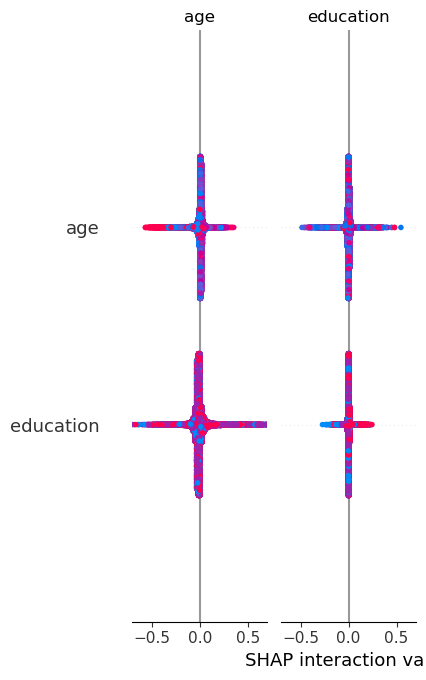

In [31]:
import shap

explainer = shap.TreeExplainer(best_model) 
shap_values = explainer.shap_values(x)

shap.summary_plot(shap_values, x, feature_names=feature_names)
